# Kütüphanelerin ve Veri Setinin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('dava.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,132,8,35206,49,2,0
1,300,12,46106,46,2,1
2,136,2,16411,31,1,1
3,101,1,7911,35,1,0
4,218,16,6734,33,1,0


# Veri Seti Hakkında Genel Bilgiler

* **Case Duration (Gün):** Davanın tamamlanması için geçen süre (gün cinsinden).
* **Number of Witnesses (Tanık Sayısı):** Dava boyunca dinlenen tanık sayısı.
* **Legal Fees (Hukuk Maliyetleri):** Dava süresince oluşan toplam hukuk maliyetleri (USD cinsinden).
* **Number of Evidence Items (Delil Sayısı):** Davada kullanılan delil sayısı.
* **Severity (Ciddiyet Düzeyi):** Davanın ciddiyet düzeyi (1: Düşük, 2: Orta, 3: Yüksek).
* **Outcome (Sonuç):** Davanın sonucu (0: Aleyhte, 1: Lehinde).

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Case Duration (Days)      100 non-null    int64
 1   Number of Witnesses       100 non-null    int64
 2   Legal Fees (USD)          100 non-null    int64
 3   Number of Evidence Items  100 non-null    int64
 4   Severity                  100 non-null    int64
 5   Outcome                   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


## Analiz ve Yorumlama

Veri setimize hızlıca bir göz attığımızda, 100 farklı davaya ait 6 farklı özellik (sütun) görüyoruz. `info()` çıktısı, verimizin eksiksiz ve temiz olduğunu, hiçbir hücrede boş (null) değer olmadığını doğruluyor. Bu da veri temizliğiyle vakit kaybetmeden doğrudan kümeleme analizine geçebileceğimiz anlamına geliyor.

# Görevler

1. **Özellik Seçimi:**  
    * Hangi özelliklerin kümeleme için kullanılacağına karar verin.
    * Kümeleme için uygun özellikleri seçin.
2. **Küme Sayısını Belirleme:**  
    * Elbow yöntemi ile optimal küme sayısını belirleyin.
3. **Kümeleme İşlemi:**
    * K-Means algoritmasını kullanarak verileri kümeleyin.  
4. **Sonuçları Görselleştirme:**
    * Kümeleme sonuçlarını uygun grafiklerle görselleştirin ve yorumlayın.

## 1.Görev: Özellik Seçimi

In [3]:
features = data.drop('Outcome', axis=1)

# veri seti istatiksel özet
features.describe()

,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,200.210000,8.78000,26431.840000,26.380000,1.830000
std,96.648514,5.60948,13805.431128,13.908634,0.792069
min,31.000000,1.00000,6154.000000,1.000000,1.000000
25%,115.250000,4.00000,13194.750000,16.000000,1.000000
50%,210.500000,8.00000,25137.500000,26.000000,2.000000
75%,287.500000,13.00000,37990.250000,37.500000,2.000000
max,360.000000,19.00000,49080.000000,49.000000,3.000000


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Analiz ve Yorumlama

K-Means gibi mesafe tabanlı algoritmalar için en önemli adımlardan biri, özelliklerin ölçeklendirilmesidir. `describe()` çıktısına baktığımızda, "Legal Fees (USD)" gibi on binlerle ifade edilen bir sütun ile "Severity" gibi sadece 1-3 arasında değer alan bir sütun olduğunu görüyoruz. Eğer veriyi olduğu gibi kullanırsak, algoritma doğal olarak büyük sayılara sahip olan "Legal Fees" sütununu daha önemli sanacak ve kümelemeyi büyük ölçüde ona göre yapacaktır.

Bu yanlılığı önlemek için `StandardScaler` kullandık. Bu araç, tüm sütunları sanki aynı "dil"i konuşuyormuş gibi ortak bir ölçeğe (ortalama=0, standart sapma=1) getirir. Böylece her bir özelliğin kümeleme sürecine adil bir şekilde katkıda bulunmasını sağlamış olduk.

## 2.Görev: Küme Sayısını Belirleme

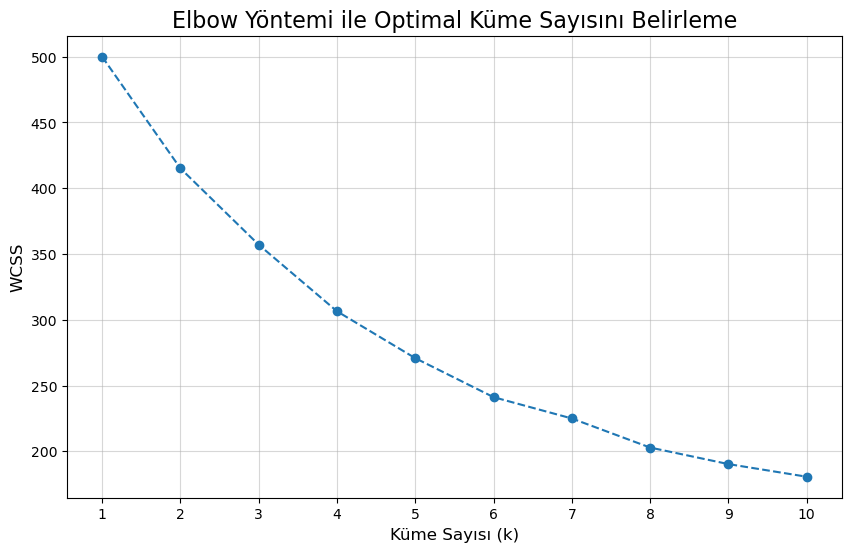

In [5]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısını Belirleme', fontsize=16)
plt.xlabel('Küme Sayısı (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.5)
plt.show()

### Analiz ve Yorumlama

K-Means'e başlamadan önce cevaplamamız gereken en önemli soru şudur: "Verimizi kaç gruba ayırmalıyız?" İşte bu sorunun cevabını bulmak için **Elbow (Dirsek) Yöntemi**'ni kullandık.

Bu yöntemin mantığı oldukça basittir. 1'den 10'a kadar farklı küme sayıları için modeli çalıştırıp, her seferinde WCSS (Küme İçi Kareler Toplamı) adı verilen bir hata skorunu hesapladık. Bu skor, kümelerin ne kadar "sıkı" ve iyi gruplandığını gösterir; ne kadar düşükse o kadar iyidir.

Grafiği incelediğimizde, küme sayısı arttıkça WCSS değerinin düştüğünü görüyoruz. Ancak bizim aradığımız nokta, bu düşüşün hızının en belirgin şekilde yavaşladığı, yani grafiğin bir "dirsek" yaptığı yerdir. Bu nokta, daha fazla küme eklemenin çok da bir anlam ifade etmediği ideal dengeyi gösterir. Grafiğimizde bu dirsek noktasının **k=3**'te olduğunu net bir şekilde görebiliyoruz. Bu nedenle, davalarımızı 3 farklı gruba ayırmaya karar verdik.

## 3.Görev: Kümeleme İşlemi

In [6]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

print("Her bir kümeye ait veri sayısı:")
print(data['Cluster'].value_counts())
data.head()

Her bir kümeye ait veri sayısı:
1    41
0    36
2    23
Name: Cluster, dtype: int64


,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome,Cluster
0,132,8,35206,49,2,0,1
1,300,12,46106,46,2,1,1
2,136,2,16411,31,1,1,0
3,101,1,7911,35,1,0,0
4,218,16,6734,33,1,0,0


### Analiz ve Yorumlama

Dirsek yöntemiyle optimal küme sayısını 3 olarak belirledikten sonra, K-Means modelini bu ayarlarla çalıştırdık. `fit_predict` fonksiyonu, her bir dava için hangi kümeye (0, 1 veya 2) ait olduğunu belirledi.

Bu küme etiketlerini, analizimizi kolaylaştırmak için orijinal veri tablomuza `Cluster` adında yeni bir sütun olarak ekledik. `value_counts()` çıktısı, bu 3 kümenin veri sayısı bakımından birbirine yakın ve dengeli bir şekilde oluştuğunu gösteriyor.

## 4.Görev: Sonuçları Görselleştirme

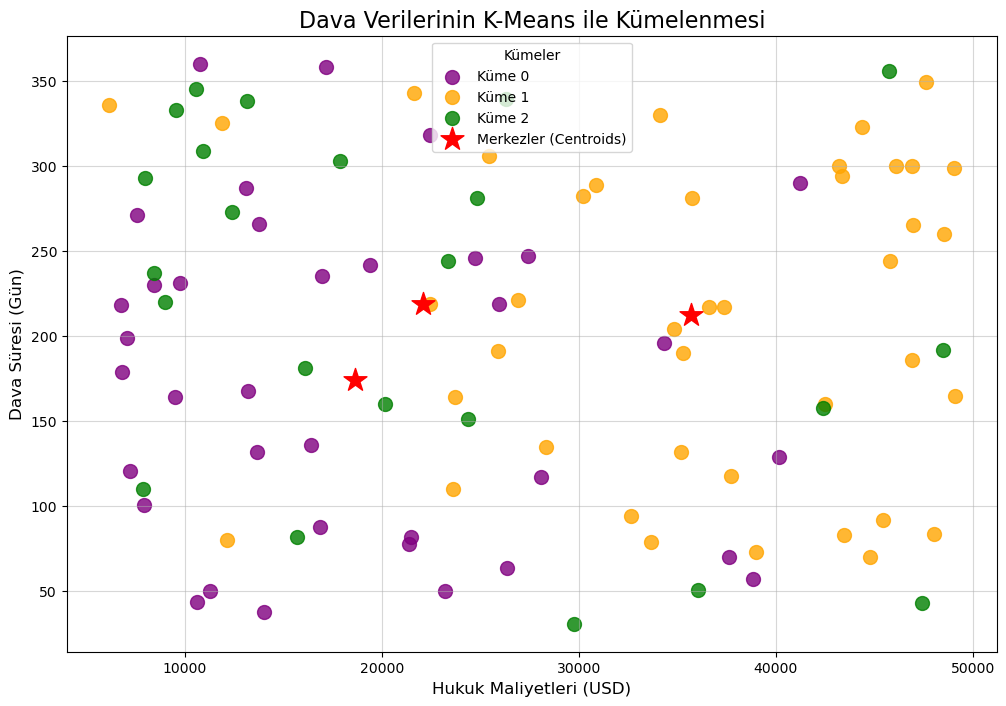

In [7]:
plt.figure(figsize=(12, 8))
clusters = sorted(data['Cluster'].unique()) 
colors = ['purple', 'orange', 'green']

for i, cluster in enumerate(clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Legal Fees (USD)'], 
                cluster_data['Case Duration (Days)'], 
                s=100, 
                c=colors[i], 
                label=f'Küme {cluster}', 
                alpha=0.8)

centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

x_centroid_idx = features.columns.get_loc('Legal Fees (USD)')
y_centroid_idx = features.columns.get_loc('Case Duration (Days)')

plt.scatter(centroids[:, x_centroid_idx], 
            centroids[:, y_centroid_idx], 
            s=300, c='red', marker='*', 
            label='Merkezler (Centroids)')

plt.title('Dava Verilerinin K-Means ile Kümelenmesi', fontsize=16)
plt.xlabel('Hukuk Maliyetleri (USD)', fontsize=12)
plt.ylabel('Dava Süresi (Gün)', fontsize=12)
plt.legend(title='Kümeler')
plt.grid(True, alpha=0.5)
plt.show()

In [8]:
cluster_analysis = data.drop('Outcome', axis=1).groupby('Cluster').mean()
cluster_analysis

,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity
Cluster,,,,,
0,174.472222,7.138889,18646.250000,17.888889,1.333333
1,212.439024,11.463415,35697.975610,35.097561,1.658537
2,218.695652,6.565217,22100.086957,24.130435,2.913043


### Analiz ve Yorumlama

Son adımda, modelimizin oluşturduğu bu kümelerin ne anlama geldiğini yorumlamak için hem bir grafik çizdik hem de kümelerin ortalama özelliklerini inceledik.

#### Grafik Yorumu

*   **X Ekseni:** Hukuk maliyetlerini, **Y Ekseni:** ise dava süresini gösteriyor.
*   Her bir renk, farklı bir kümeyi temsil ediyor. Kırmızı yıldızlar ise her kümenin merkez noktasını gösteriyor.

Grafik, davaların maliyet ve sürelerine göre 3 farklı gruba ayrıldığını görsel olarak doğruluyor. Şimdi bu grupların kimliklerini anlayalım.

#### Kümelerin Detaylı Analizi

Yukarıdaki tablo, her kümenin "karakterini" ortaya koyuyor:
*   **Küme 0 (Mor): Düşük Maliyetli, Ortalama Süreli Davalar**
    *   Bu grup, en düşük hukuk maliyetine (ortalama **18,646 USD**) sahip davaları içeriyor. Dava süreleri ise ortalama düzeyde. Bu küme, muhtemelen standart, daha az karmaşık davaları temsil ediyor.

*   **Küme 1 (Turuncu): Yüksek Maliyetli, Uzun Süreli Davalar**
    *   Hem dava süresi (ortalama **212 gün**) hem de hukuk maliyeti (ortalama **35,697 USD**) en yüksek olan grup budur. Aynı zamanda en çok tanık da bu davalarda bulunuyor. Bu küme, muhtemelen karmaşık, uzun soluklu ve yüksek profilli davaları içeriyor.

*   **Küme 2 (Yeşil): Ciddiyeti Yüksek, Ortalama Maliyetli Davalar**
    *   Bu grubun en belirgin özelliği, "Severity" (Ciddiyet) düzeyinin ortalama **2.91** ile açık ara en yüksek olmasıdır. Dava süreleri uzun olsa da maliyetleri Küme 1'e göre daha düşüktür. Bu, davanın kendisinin ciddi olduğunu ancak belki de daha az tanık veya daha kısa bir hazırlık süreci gerektirdiğini düşündürebilir.